In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
import csv
import pandas as pd

# Open the CSV file and skip problematic rows
rows = []
with open("/content/imdb_rating.csv", "r", encoding="utf-8") as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        rows.append(row)

# Convert the list of rows into a DataFrame
data = pd.DataFrame(rows[1:], columns=rows[0])


In [5]:
print(data.head())


                                              Review Rating Sentiment
0  Kurt Russell's chameleon-like performance, cou...     10         1
1  It was extremely low budget(it some scenes it ...      8         1
2  James Cagney is best known for his tough chara...      8         1
3  Following the brilliant "Goyôkiba" (aka. "Hanz...      8         1
4  One of the last classics of the French New Wav...     10         1


In [6]:
# Preprocess the text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

In [9]:
# max_features limits the number of unique words in the vocabulary to speed up computation
# stop_words removes common English words that don't carry much meaning
X = vectorizer.fit_transform(data['Review'])  # Adjust column name if needed
y = data['Sentiment']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

In [14]:
# Convert X_train and X_test from sparse matrix to DataFrame
X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train)
X_test_df = pd.DataFrame.sparse.from_spmatrix(X_test)

In [15]:
# Check for missing values in X_train and y_train
print("Missing values in X_train:", X_train_df.isnull().sum())
print("Missing values in y_train:", y_train.isnull().sum())

Missing values in X_train: 0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Length: 5000, dtype: int64
Missing values in y_train: 1


In [23]:
# Find the index of the row with missing value in y_train
missing_value_index = y_train[y_train.isnull()].index
print("Missing value index:", missing_value_index)



Missing value index: Index([], dtype='int64')


In [22]:
print("Missing value index:", missing_value_index)


Missing value index: 44430


In [24]:
print("Size of X_train:", X_train.shape[0])
print("Size of y_train:", y_train.shape[0])


Size of X_train: 35544
Size of y_train: 35543


In [27]:
from scipy import sparse

# Convert X_train to a dense array for slicing
X_train_dense = X_train.toarray()

# Remove the extra sample from X_train_dense
X_train_dense = np.delete(X_train_dense, missing_value_index, axis=0)

# Convert X_train_dense back to a sparse matrix
X_train = sparse.csr_matrix(X_train_dense)



In [31]:
# Remove the corresponding label from y_train
y_train = y_train.drop(y_train.index[missing_value_index])


In [33]:
print("Size of X_train:", X_train.shape[0])
print("Size of y_train:", y_train.shape[0])


Size of X_train: 35544
Size of y_train: 35543


In [34]:
print("Indices of X_train:", np.arange(X_train.shape[0]))
print("Indices of y_train:", y_train.index)


Indices of X_train: [    0     1     2 ... 35541 35542 35543]
Indices of y_train: Index([29807, 43183, 33497, 38982, 10648,  7759, 34430,  6870, 33059,  5041,
       ...
       16023, 44131, 21962, 37194, 16850,  6265, 11284, 38158,   860, 15795],
      dtype='int64', length=35543)


In [35]:
X_train = X_train[:-1]


In [37]:
print("Size of X_train:", X_train.shape[0])
print("Size of y_train:", y_train.shape[0])


Size of X_train: 35543
Size of y_train: 35543


In [40]:
# Calculate precision with pos_label='1'
precision = precision_score(y_test, y_pred, pos_label='1')



In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='1')
    recall = recall_score(y_test, y_pred, pos_label='1')
    f1 = f1_score(y_test, y_pred, pos_label='1')

    # Print classifier name and performance metrics
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("="*60)


Classifier: Naive Bayes
Accuracy: 0.79
Precision: 0.74
Recall: 0.96
F1-score: 0.84
Classifier: Decision Tree
Accuracy: 0.59
Precision: 0.63
Recall: 0.63
F1-score: 0.63
Classifier: Linear SVM
Accuracy: 0.72
Precision: 0.73
Recall: 0.80
F1-score: 0.76
Classifier: Random Forest
Accuracy: 0.79
Precision: 0.77
Recall: 0.90
F1-score: 0.83


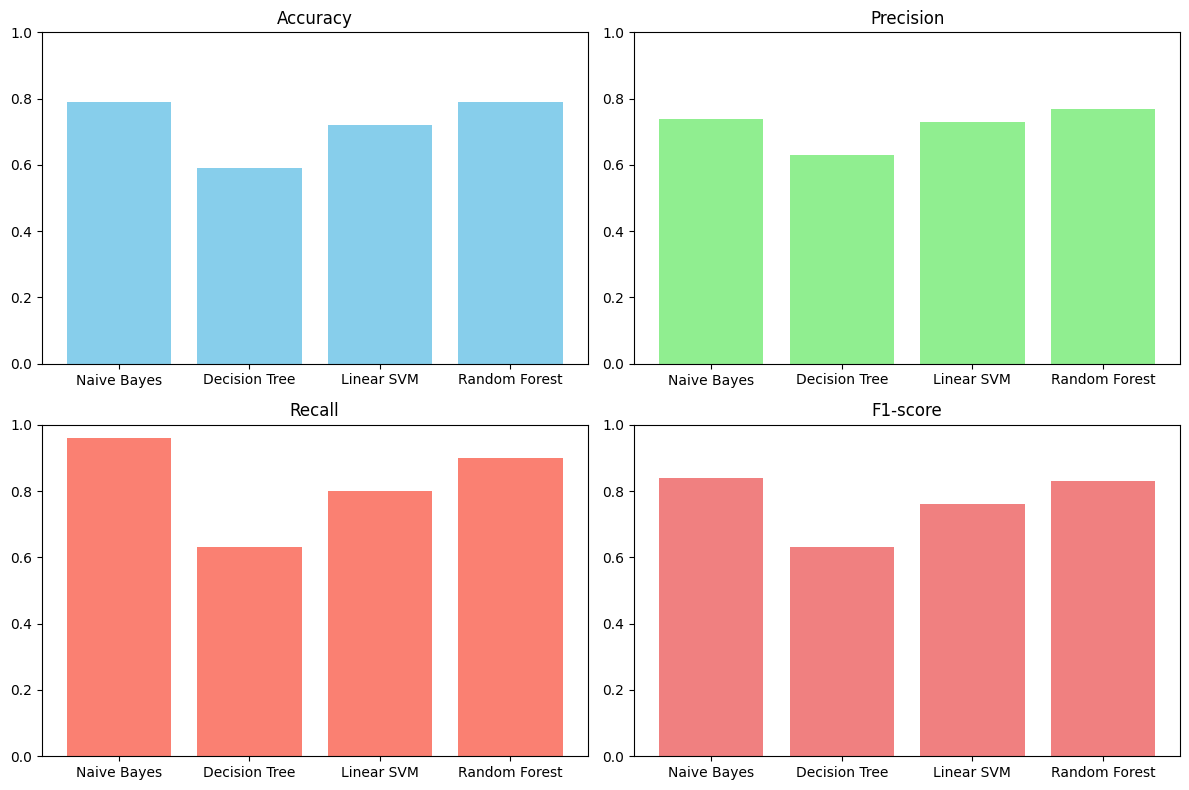

In [46]:
import matplotlib.pyplot as plt

# Define classifiers and corresponding performance metrics
classifiers = ['Naive Bayes', 'Decision Tree', 'Linear SVM', 'Random Forest']
accuracy = [0.79, 0.59, 0.72, 0.79]
precision = [0.74, 0.63, 0.73, 0.77]
recall = [0.96, 0.63, 0.80, 0.90]
f1_score = [0.84, 0.63, 0.76, 0.83]

# Plot bar plots for each performance metric
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(classifiers, accuracy, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)

# Precision
plt.subplot(2, 2, 2)
plt.bar(classifiers, precision, color='lightgreen')
plt.title('Precision')
plt.ylim(0, 1)

# Recall
plt.subplot(2, 2, 3)
plt.bar(classifiers, recall, color='salmon')
plt.title('Recall')
plt.ylim(0, 1)

# F1-score
plt.subplot(2, 2, 4)
plt.bar(classifiers, f1_score, color='lightcoral')
plt.title('F1-score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
